In [2]:
import spacy
import matplotlib.pyplot as plt

from mine_location_descriptions import get_location_descriptions
from import_data import import_data
from word_frequency import word_pos_frequency
import search_pattern as search_p

nlp = spacy.load('nl_core_news_sm')

data_ongelukscraped = import_data('hetongelukscraped.csv', column='Artikel')
input_data_ongelukscraped = get_location_descriptions(data_ongelukscraped, nlp)

data_flitsservice_train = import_data('flitsservice_trainset.csv', column='Artikel')
input_data_flitsservice_train = get_location_descriptions(data_flitsservice_train, nlp)

### Meest voorkomende combinaties tussen voorzetsels en toponiemen, per volgorde
"#loc" is een toponiem, "ADP" is een voorzetsel

De plot hieronder is vrijwel hetzelfde gebleven als vorige week. Ik heb alleen wat aan de toponiemen aangepast, nu horen 'ter hoogte van', 'richting' en 'kruising' ook bij ADPs (voorzetsels). 'van' en 'met' heb ik uit de ADPs gehaald, omdat die niets zeggen over een locatie. Je zal zien dat dit her en der nog niet werkt, ik snap nog niet waarom. SpaCy doet hiermee een beetje gek.

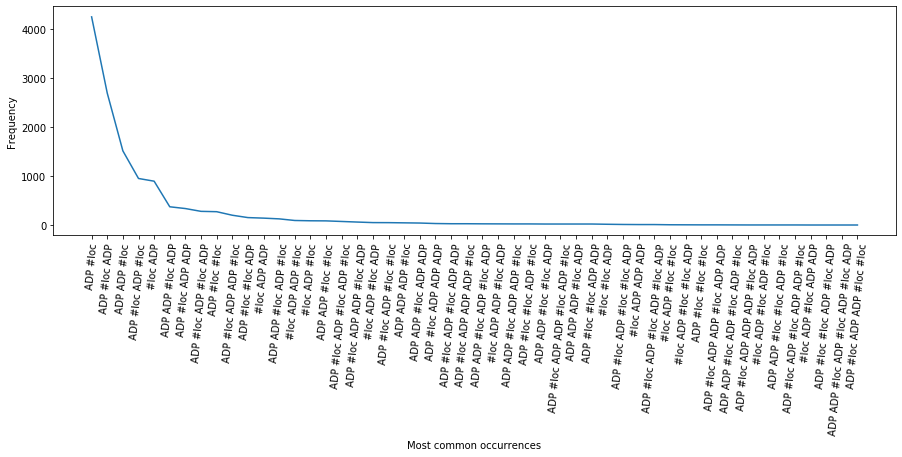

In [5]:

span_location_ADP = word_pos_frequency(input_data_flitsservice_train, pos_list=["ADP"], pos_or_word=1)

### Meest voorkomende combinaties, "ADP #loc"
De plot hieronder laat de meest voorkomende voorzetsels zien per vorige categorie, in dit geval "ADP #loc". Te zien is dat "van #loc" en "met #loc" er nog tussen staan. Deze plot is gefilterd: alle voorzetsels na de laatste toponiem in een span, zijn verwijderd. Deze voorzetsels voegen niets toe aan het vinden van een locatie.

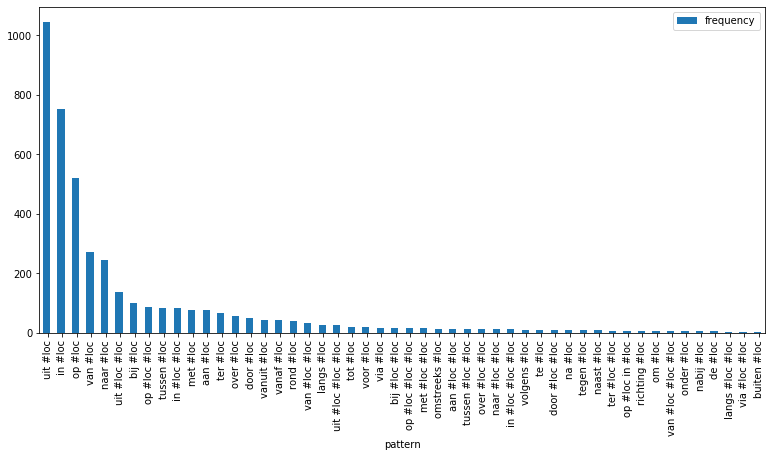

In [31]:
# import importlib
# importlib.reload(search_p)
span_location_ADPloc = search_p.adposition_frequencies_per_pattern("ADP #loc", span_location_ADP, input_data_flitsservice_train)

### Voorbeelden van categorie "in #loc" uit de bovenstaande plot
Toponiemen zijn rood gemarkeerd, voorzetsels groen

In [37]:
search_p.show_pattern_occurrences("in #loc", span_location_ADPloc, input_data_flitsservice_train)

 DodelijkADJ ongevalNOUN in VurenGPE DinsdagochtendPROPN 19NUM decemberNUM vondVERB
 eenDET eenzijdigADJ verkeersongevalNOUN in Borgharen-MaastrichtGPE overledenVERB .PUNCT
 EenDET voetgangerNOUN isVERB in BarendrechtGPE omCONJ hetX levenX gekomenVERB
 snelwegNOUN in deDET richtingNOUN AmsterdamGPE isVERB anderhalfNUM uurNOUN afgeslotenVERB
 ziekenhuizenNOUN in TielNOUN enCONJ NijmegenGPE gebrachtVERB .PUNCT
 In hetDET voertuigFAC zatenVERB ookADV nogADV drieNUM
 ongelukNOUN datCONJ vrijdagavondNOUN in UtrechtGPE gebeurdeVERB wasVERB eenDET politiebusNOUN
 longNOUN opgenomenVERB in hetDET ziekenhuisFAC .PUNCT
 isVERB laterADJ in hetDET ziekenhuisFAC eenDET bloedproefNOUN afgenomenVERB omCONJ
 hetDET AntoniusNOUN ZiekenhuisPROPN in SneekGPE vervoerdVERB .PUNCT
 UniversitairNOUN MedischPROPN CentrumPROPN in GroningenGPE .PUNCT
 meerdereNUM personenNOUN in hetDET voertuigFAC zittenVERB .PUNCT  SPACE
 diezelfdePRON avondNOUN in hetDET ziekenhuisFAC overledenVERB .PUNCT
 wildeVERB in deDET 

 deDET DenNOUN ElterwegPROPN in ZutphenGPE .PUNCT
 isVERB opgenomenVERB in hetDET ziekenhuisFAC .PUNCT
 isVERB zondagmiddagNOUN overledenVERB in VlaardingenGPE .PUNCT
 metX eenDET autoNOUN in BurgumGPE .PUNCT
 TerbregsepleinNOUN in deDET richtingNOUN GoudaGPE .PUNCT
 diePRON duidenNOUN in eenDET bepaaldNORP merkNOUN ,PUNCT kleurNOUN ofCONJ
 momentNOUN rijlesNOUN in hetDET voertuigFAC .PUNCT
 genietVERB groteADJ bekendheidNOUN in NijmegenGPE enCONJ omgevingNOUN .PUNCT
 ZoADV staatVERB in eenDET ZweedseNORP krantNOUN .PUNCT
 hetDET spoorNOUN ookADV in ZwedenGPE uitADV .PUNCT
 gedokenVERB in hetDET naastgelegenVERB Noord-WillemskanaalFAC .PUNCT
 zondagochtendADV 7NUM oktoberNUM in GeffenGPE zwaarADJ gewondVERB raakteVERB nadatCONJ
 dezePRON weekNOUN gestolenVERB in RotterdamGPE .PUNCT
 in deDET weekNOUN hetDET ziekenhuisFAC verlatenVERB .PUNCT
 wasVERB volledigADJ afgeslotenVERB in verbandGPE metX sporenonderzoekNOUN .PUNCT  SPACE
 hijPRON onderuitADV gingVERB in Rotterdam-NoordGPE .PUNCT

### Meest voorkomende combinaties, ADP #loc ADP #loc

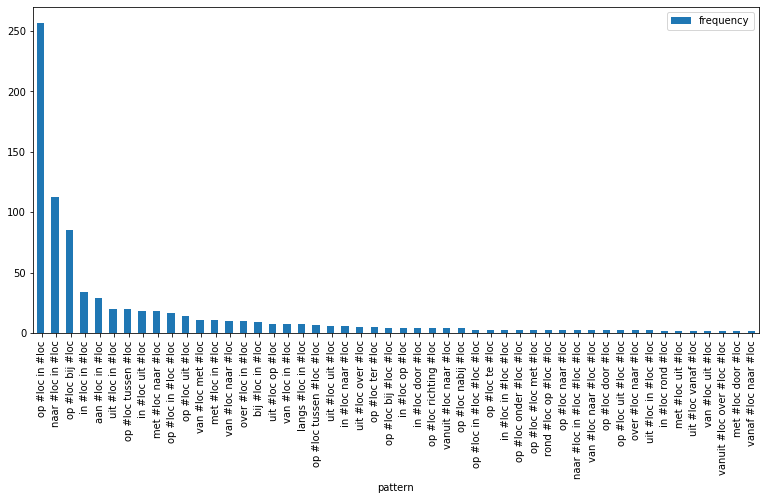

In [39]:
span_location_ADPlocADPloc = search_p.adposition_frequencies_per_pattern("ADP #loc ADP #loc", span_location_ADP, input_data_flitsservice_train)


### Voorbeelden van categorie "op #loc in #loc" uit de bovenstaande plot
Toponiemen zijn rood gemarkeerd, voorzetsels groen

In [42]:
search_p.show_pattern_occurrences("op #loc in #loc", span_location_ADPlocADPloc, input_data_flitsservice_train)

 zaterdagNOUN aangeredenVERB op deDET LangebosschedijkLOC in WildervankGPE .PUNCT
 ongelukNOUN gebeurdeVERB op deDET CabergerwegFAC in MaastrichtGPE .PUNCT
 eenDET ongevalNOUN op DeNOUN DiepertLOC in TielGPE .PUNCT
 zouVERB liggenVERB op deDET TichelwegLOC in AlbergenGPE .PUNCT
 eenDET ongelukNOUN op deDET Ringbaan-ZuidFAC in TilburgGPE .PUNCT
 eenzijdigADJ verkeersongevalNOUN op deDET MaastrichterwegLOC in PuthGPE isVERB donderdagnachtNOUN deDET bestuurderNOUN
 aanrijdingNOUN gemeldVERB op deDET RijssensestraatGPE in NijverdalGPE .PUNCT
 tweeNUM auto'sNOUN op deDET HoeksewegLOC in HoekLOC .PUNCT
 eenDET ernstigADJ ongevalNOUN op Kanaal-NoordGPE in BeemteGPE .PUNCT
 eenDET ongelukNOUN op deDET SnoertsebaanFAC in DeurneGPE .PUNCT
 eenDET aanrijdingNOUN op deDET DuinstraatFAC in KoudekerkeGPE isVERB vanavondADV éénVERB persoonNOUN
 eenDET aanrijdingNOUN op deDET N209FAC in BergschenhoekGPE isVERB dinsdagochtendADJ eenDET 49-jarigeADJ
 eenzijdigADJ verkeersongevalNOUN op deDET DellewegLOC